In [141]:
# For uploading and accessing the data
import pandas as pd
import numpy as np

# from numpy import mean
# from numpy import std
# from numpy.random import randn
# from numpy.random import seed

# for Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# For resize the distribution of values
from sklearn.preprocessing import StandardScaler

# For create our training data and test data
from sklearn.model_selection import train_test_split

# from numpy.random import randn
# from numpy.random import seed


import requests

# Import the image module from the pillow and call the Image
from PIL import Image

# remove the warning from notebook
import warnings; warnings.simplefilter('ignore')

In [142]:
# from google.colab import drive
# drive.mount('/content/drive')

In [143]:
# raiting=pd.read_csv("/content/drive/MyDrive/Final project_BR/BX-Book-Ratings.csv",delimiter= ';', encoding= 'unicode_escape')
# user=pd.read_csv("/content/drive/MyDrive/Final project_BR/BX-Users.csv" ,delimiter= ';',encoding= 'unicode_escape')
# books=pd.read_csv("/content/drive/MyDrive/Final project_BR/BX_Books.csv" ,delimiter= ';', encoding= 'unicode_escape')
# raiting=pd.read_csv("/content/drive/MyDrive/Graduation Project/Data/BX-Book-Ratings.csv",delimiter= ';', encoding= 'unicode_escape')
# user=pd.read_csv("/content/drive/MyDrive/Graduation Project/Data/BX-Users.csv" ,delimiter= ';',encoding= 'unicode_escape')
# books=pd.read_csv("/content/drive/MyDrive/Graduation Project/Data/BX_Books.csv" ,delimiter= ';', encoding= 'unicode_escape')

# Reading the files by using read_csv method
rating=pd.read_csv("../input/gp-debi/BX-Book-Ratings.csv",delimiter= ';', encoding= 'unicode_escape')
user=pd.read_csv("../input/gp-debi/BX-Users.csv" ,delimiter= ';',encoding= 'unicode_escape')
books=pd.read_csv("../input/gp-debi/BX_Books.csv" ,delimiter= ';', encoding= 'unicode_escape')

In [144]:
# displays the first five rows of the raiting dataset
rating.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [145]:
# Show the dimension of rating dataset
rating.shape

(1149780, 3)

In [146]:
# displays the first five rows of the user dataset
user.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [147]:
# Show the dimension of user dataset
user.shape

(278858, 3)

In [148]:
# displays the first five rows of the book dataset
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [149]:
# Show the dimension of rating dataset
books.shape

(271379, 8)

In [150]:
# concatenate two Dataframes (rating and user) by adding the rows of one to the other using by column's name user_id 
merged_data_first = rating.merge(user,on=["User-ID"])

In [151]:
# concatenate two Dataframes (books and merged_data_first) by adding the rows of one to the other using by column's name ISBN 
all_data = books.merge(merged_data_first,on=["ISBN"])

In [152]:
# displays the first five rows of the all marged datasets
all_data.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,"n/a, n/a, n/a",NaN
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0,"sudbury, ontario, canada",NaN


In [153]:
# Show the dimension of data dataset
all_data.shape

(1031175, 12)

## **Data Preprocessing**

In [154]:
# Show the information about the all datasets
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031175 entries, 0 to 1031174
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031175 non-null  object 
 1   Book-Title           1031175 non-null  object 
 2   Book-Author          1031174 non-null  object 
 3   Year-Of-Publication  1031175 non-null  object 
 4   Publisher            1031173 non-null  object 
 5   Image-URL-S          1031175 non-null  object 
 6   Image-URL-M          1031175 non-null  object 
 7   Image-URL-L          1031174 non-null  object 
 8   User-ID              1031175 non-null  int64  
 9   Book-Rating          1031175 non-null  int64  
 10  Location             1031175 non-null  object 
 11  Age                  753330 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB


In [155]:
# Show the count of null values in each column
all_data.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 1
User-ID                     0
Book-Rating                 0
Location                    0
Age                    277845
dtype: int64

In [156]:
# display the column's name in all datasets
all_data.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating',
       'Location', 'Age'],
      dtype='object')

In [157]:
# Make some of changes on column's name such as Convert the upper case of column's name to lower case and replace the dash character to underscore character 
all_data.columns= all_data.columns.str.strip().str.lower().str.replace('-', '_')

In [158]:
# get a descriptive statistics summary of a all datasets and transpose the data by moving the rows data to the column and columns data to the rows
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1031175.0,140594.373956,80524.435020,2.0,70415.0,141210.0,211426.0,278854.0
book_rating,1031175.0,2.839022,3.854149,0.0,0.0,0.0,7.0,10.0
age,753330.0,37.397719,14.098189,0.0,28.0,35.0,45.0,244.0


In [159]:
# returns the number of unique values for each column
all_data.nunique()

isbn                   270170
book_title             241090
book_author            101593
year_of_publication       202
publisher               16728
image_url_s            269861
image_url_m            269861
image_url_l            269860
user_id                 92107
book_rating                11
location                22480
age                       141
dtype: int64

In [160]:
# get the count of duplicate rows of all datasets
all_data.duplicated().sum()

0

### droping uncessaray columns

In [161]:
# data = data.drop(columns = ["Image-URL-S","Image-URL-M","Image-URL-L", "Age"])

In [162]:
# Show all datasets
all_data

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating,location,age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,"n/a, n/a, n/a",NaN
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0,"sudbury, ontario, canada",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1031170,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463,7,"providence, rhode island, usa",26.0
1031171,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579,4,"orem, utah, usa",12.0
1031172,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680,0,"hopewell junction, new york, usa",55.0
1031173,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680,0,"hopewell junction, new york, usa",55.0


In [163]:
# you can also count the ratio of missing values
total_miss = all_data.isnull().sum()
percent_miss = (total_miss/all_data.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False)

,Total missing,% missing
age,277845,26.944505
publisher,2,0.000194
book_author,1,0.000097
image_url_l,1,0.000097
isbn,0,0.000000
book_title,0,0.000000
year_of_publication,0,0.000000
image_url_s,0,0.000000
image_url_m,0,0.000000
user_id,0,0.000000


## Changing datatypes and replacing nan values

### Publisher column

In [164]:
# get the dataset has null values of publisher in all datasets
all_data.loc[all_data.publisher.isnull()]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating,location,age
824230,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,98391,9,"morrow, georgia, usa",52.0
824539,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,98391,9,"morrow, georgia, usa",52.0


In [165]:
# data.loc[data.ISBN == '193169656X']
# data.loc[data.ISBN =='1931696993']

In [166]:
# Fill the null vallue of publisher column in the dataset
all_data.loc[all_data.isbn =='193169656X','publisher']='Mundania Press LLC'
all_data.loc[all_data.isbn =='1931696993','publisher']='Novelbooks Incorporated'

### book author

In [167]:
# get the dataset has null values of book_author in all datasets
all_data.loc[all_data["book_author"].isnull()]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating,location,age
929125,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,98647,8,"selayang, selangor, malaysia",26.0


In [168]:
# Fill the null values of book_author in all datasets
all_data.loc[all_data.isbn=='9627982032','book_author']='Larissa Anne Downe'

### chincking for the nan value

In [169]:
# you can also count the ratio of missing values
total_miss = all_data.isnull().sum()
percent_miss = (total_miss/all_data.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False)


,Total missing,% missing
age,277845,26.944505
image_url_l,1,0.000097
isbn,0,0.000000
book_title,0,0.000000
book_author,0,0.000000
year_of_publication,0,0.000000
publisher,0,0.000000
image_url_s,0,0.000000
image_url_m,0,0.000000
user_id,0,0.000000


### Year-Of-Publication

In [170]:
# find the unique elements of year_of_publication column
all_data["year_of_publication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, '1990', '1993', '1987',
       '2000', '1982', '1988', '1980', '0', '1986', '1981', '1978',
       '1991', '1989', '1994', '1992', '1979', '1984', '1977', '1983',
       '1998', '1996', '1997', '2001', '1995', '2002', '1999', '2004',
       '2003', '1985', '1960', '1970', '1976', '1973', '1971', '1975',
       '1955', '1967', '1940', '1968', '1957', '1965', '1930', '1972',
       '1974', '1969', '1964', '1962', '1956', '1966', '1931', '196

In [171]:
# Show the rows have Canterbury Press values of year_of_publication in all datasets
all_data.loc[all_data["year_of_publication"] =='Canterbury Press']

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating,location,age
787566,1853114103,Lord Have Mercy,"""Ron"";2001""",Canterbury Press,http://images.amazon.com/images/P/1853114103.0...,http://images.amazon.com/images/P/1853114103.0...,http://images.amazon.com/images/P/1853114103.0...,NaN,193560,9,"coalville, england, united kingdom",37.0


In [172]:
# drop the rows have Canterbury Press of year_of_publication in all datasets
all_data.drop(all_data.loc[all_data["year_of_publication"] =='Canterbury Press'].index, axis= 0, inplace= True)

In [184]:
# get the count of null values of year_of_publication in all datasets
all_data["year_of_publication"].isnull().sum()

0

In [187]:
# find the unique elements of year_of_publication column and sort it by ascending
all_data["year_of_publication"].sort_values(ascending = True ).unique()

array([   0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908,
       1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924,
       1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935,
       1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021,
       2024, 2026, 2030, 2037, 2038, 2050])

In [185]:
# Get the information about  data type of year_of_publication in all datasets
all_data["year_of_publication"].dtype

dtype('O')

In [186]:
# Change the data type of year_of_publication in all datasets
all_data["year_of_publication"] = all_data["year_of_publication"].astype("int64")

In [188]:
# check the data type of year_of_publication changed or not
all_data["year_of_publication"].dtype

dtype('int64')

In [189]:
# Get the dataset has zero in year_of_publication 
all_data[all_data["year_of_publication"] == 0]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating,location,age
12969,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,242,10,"neuffen, baden-wuerttemberg, germany",37.0
12970,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,66485,0,"berlin, berlin, germany",NaN
12971,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,70238,0,"münchen, bavaria, germany",26.0
12972,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,75115,0,"darmstadt, hessen, germany",31.0
12973,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,78761,7,"heide, schleswig-holstein, germany",34.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1030669,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...,245295,0,"puchong, selangor, malaysia",24.0
1030785,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...,246671,0,"melbourne, victoria, australia",27.0
1030946,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,259660,9,"bilbao, vizcaya, spain",21.0
1031034,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...,259901,0,"thompson, manitoba, canada",NaN


In [190]:
# Show dataset has the year_of_publication is zero or more than 2022 of year_of_publication in all datasets
all_data.loc[(all_data["year_of_publication"] == 0)|(all_data["year_of_publication"]>2022) ,'year_of_publication' ]

12969      0
12970      0
12971      0
12972      0
12973      0
          ..
1030669    0
1030785    0
1030946    0
1031034    0
1031045    0
Name: year_of_publication, Length: 14064, dtype: int64

In [191]:
# Show dataset has the year_of_publication is zero or more than 2022 of year_of_publication in all datasets and replace them to null values
all_data.loc[(all_data["year_of_publication"] == 0)|(all_data["year_of_publication"]>2022) ,'year_of_publication' ] = np.nan
# Fill null values of year_of_publication by mean values of year_of_publication 
all_data["year_of_publication"] = all_data["year_of_publication"].fillna(round(all_data["year_of_publication"].mean()))

In [192]:
# find the unique elements of year_of_publication column and sort it by ascending
all_data["year_of_publication"].sort_values(ascending = True ).unique()

array([1376., 1378., 1806., 1897., 1900., 1901., 1902., 1904., 1906.,
       1908., 1909., 1910., 1911., 1914., 1917., 1919., 1920., 1921.,
       1922., 1923., 1924., 1925., 1926., 1927., 1928., 1929., 1930.,
       1931., 1932., 1933., 1934., 1935., 1936., 1937., 1938., 1939.,
       1940., 1941., 1942., 1943., 1944., 1945., 1946., 1947., 1948.,
       1949., 1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957.,
       1958., 1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966.,
       1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975.,
       1976., 1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984.,
       1985., 1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993.,
       1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002.,
       2003., 2004., 2005., 2006., 2008., 2010., 2011., 2012., 2020.,
       2021.])

### **Column Location column**

In [193]:
# Create the new dataset has city, state and country by spliting the location column in all datasets
location = all_data.location.str.split(', ', n=2, expand=True)
location.columns=['city', 'state', 'country']

In [194]:
# Create new columns in all datasets by columns in location dataframe
all_data['city'] = location['city']
all_data['state'] = location['state']
all_data['country'] = location['country']

In [195]:
# displays the first five rows of the all marged datasets
all_data.head(5)

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating,location,age,city,state,country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,timmins,ontario,canada
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0,"ottawa, ontario, canada",49.0,ottawa,ontario,canada
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,"n/a, n/a, n/a",NaN,n/a,n/a,n/a
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0,"sudbury, ontario, canada",NaN,sudbury,ontario,canada


In [196]:
# Show the unique values in country column in all datasets
all_data.country.unique()

array(['usa', 'canada', 'n/a', None, 'malaysia', 'spain', 'new zealand',
       'finland', 'united kingdom', 'netherlands', 'portugal', 'brazil',
       'germany', 'austria', 'italy', 'australia', 'france', 'costa rica',
       'poland', 'us', 'idaho, usa', 'iran', 'aruba', 'indonesia',
       'india', 'pakistan', 'taiwan', 'singapore', 'argentina', 'romania',
       'greece', 'england, united kingdom', 'ireland', 'philippines',
       'belgium', 'philippines"', 'mexico', 'south africa',
       'burkina faso', 'ile de france, france', 'croatia', 'switzerland',
       'denmark', 'rwanda', 'yugoslavia', 'turkey', 'china', 'japan',
       'illinois, usa', 'qatar', 'latvia', 'sweden', 'kuwait', 'nepal',
       'peru', 'venezuela', 'south korea"', 'hong kong',
       'cambridgeshire, united kingdom', 'united states', 'slovakia',
       'norway', 'dominican republic', 'bosnia and herzegovina',
       'south korea', 'macedonia', 'kenya', 'mauritius', 'catalonia',
       'yu-song, guam-dong, 6

In [197]:
# Drop some features from all datasets 
all_data = all_data.drop(columns=["location","country","city","state","year_of_publication","age"])                    

### **User_id column**

In [198]:
# Show the unique values in user_id column in all datasets
all_data["user_id"].unique 

<bound method Series.unique of 0               2
1               8
2           11400
3           11676
4           41385
            ...  
1031170    276463
1031171    276579
1031172    276680
1031173    276680
1031174    276680
Name: user_id, Length: 1031174, dtype: int64>

## Raiting column

In [199]:
# Show the unique values in book_rating column in all datasets
all_data["book_rating"].unique()

array([ 0,  5,  8,  9,  7,  6, 10,  4,  3,  2,  1])

In [200]:
# Show the dimension when the book_rating equel zero
all_data[(all_data['book_rating']==0)].shape

(647323, 9)

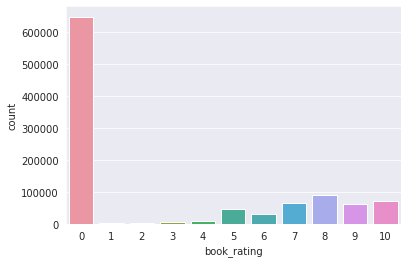

In [201]:
# Visualize the data that existing in book_rating and count them
sns.set_style('darkgrid')
sns.countplot(all_data["book_rating"], x='book_rating')
plt.show()

This countplot shows users have rated 0 the most, which can mean they haven't rated bokks at all. We have to separate the explicit ratings represented by 1–10 and implicit ratings represented by 0.

In [202]:
# Create new datasets by if the book_rating = 0 this is explicit book rating otherwise is implicit book rating
explicit_book_rating = all_data[all_data['book_rating'] != 0]
implicit_book_rating = all_data[all_data['book_rating'] == 0]

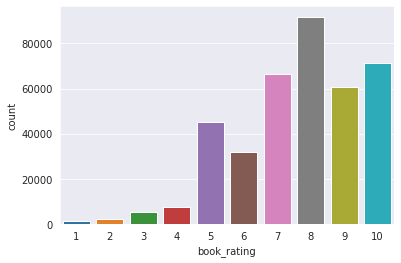

In [203]:
# Visualize the data that existing in explicit_book_rating and count them
sns.set_style('darkgrid')
sns.countplot(data= explicit_book_rating , x='book_rating')
plt.show()

Now this countplot of book_rating indicates that higher ratings are more common amongst users and rating 8 has been rated highest number of times.

## Add the number of assigned ratings. Clear from users who have rated a small number of times

In [204]:
# get the item(isbn) and book_rating and assign them to new variable
item_book_rating = all_data.groupby('isbn')['book_rating'].count().reset_index()
# Rename the column's name to num_book_rating
item_book_rating.rename(columns={'book_rating': 'num_book_rating'}, inplace=True)
# Contact the item_book_rating with all datasets 
all_item_book_rating = all_data.merge(item_book_rating, on='isbn')
all_item_book_rating

,isbn,book_title,book_author,publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating,num_book_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,1
1,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,14
2,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0,14
3,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,14
4,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0,14
...,...,...,...,...,...,...,...,...,...,...
1031169,0440400988,There's a Bat in Bunk Five,Paula Danziger,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463,7,1
1031170,0525447644,From One to One Hundred,Teri Sloat,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579,4,1
1031171,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680,0,1
1031172,0192126040,Republic (World's Classics),Plato,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680,0,1


In [205]:
# find the unique elements of num_book_rating column and sort it by ascending
all_item_book_rating['num_book_rating'].sort_values(ascending=True).unique()

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [206]:
# find the unique elements and count of num_book_rating column and sort it by ascending
all_item_book_rating['num_book_rating'].sort_values(ascending=True).value_counts()

1      145657
2       96872
3       67431
4       50716
5       40910
        ...  
172       172
163       163
160       160
141       141
137       137
Name: num_book_rating, Length: 331, dtype: int64

In [207]:
# Create the new dataset when the num_book_rating more than or equal 30
books_rating_data = all_item_book_rating[all_item_book_rating['num_book_rating'] >= 30]
books_rating_data.shape

(315065, 10)

In [208]:
# data.drop_duplicates(['user_id', 'book_title'])
# books_rating_data.shape

In [209]:
# Create The top 10 books recommendation by book_title and book_rating
top_10_books= pd.DataFrame(all_data.groupby('book_title')['book_rating'].count()
                         .sort_values(ascending=False).head(10))

print('The top ten books recommendation : ')
top_10_books

The top ten books recommendation : 


,book_rating
book_title,
Wild Animus,2502
The Lovely Bones: A Novel,1295
The Da Vinci Code,898
A Painted House,838
The Nanny Diaries: A Novel,828
Bridget Jones's Diary,815
The Secret Life of Bees,774
Divine Secrets of the Ya-Ya Sisterhood: A Novel,740
The Red Tent (Bestselling Backlist),723


In [210]:
# Split the all datasets to traing dataset and testing dataset 
train_data, test_data = train_test_split(all_data, test_size=0.20)

In [211]:
# print some information 
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set lengths: 824939
Testing set lengths: 206235
Test set is 20% of the full dataset.


In [212]:
# Create copy dataset from all datasets
df = all_data.copy()

In [213]:
# Show the columns' name
df.columns

Index(['isbn', 'book_title', 'book_author', 'publisher', 'image_url_s',
       'image_url_m', 'image_url_l', 'user_id', 'book_rating'],
      dtype='object')

In [214]:
# Get the unique values and count them
df['book_title'].value_counts()

Wild Animus                                                                                                                       2502
The Lovely Bones: A Novel                                                                                                         1295
The Da Vinci Code                                                                                                                  898
A Painted House                                                                                                                    838
The Nanny Diaries: A Novel                                                                                                         828
                                                                                                                                  ... 
La Zapatera Prodigiosa                                                                                                               1
Por ver mi estrella MarÃ­a (Plaza & JanÃ©s/literaria)  

In [215]:
all_data.loc[(all_data['publisher'].isnull()),'publisher']

Series([], Name: publisher, dtype: object)

In [216]:
# Replace some values to another values
all_data.loc[(all_data['isbn'] == '9627982032'),'book_author'] = 'other'
all_data.loc[(all_data['publisher'].isnull()),'publisher'] = 'no mention'

## **The model: Collaborative Filtering**

In [219]:
# Make item based recommendation model
def item_based_recommender(book_title):
    # Change any datatype of book_title to string values
    book_title = str(book_title)
    
    # Check the book_title values existing in book_title columns in all datasets
    if book_title in df['book_title'].values:
        
        # Create the dataframe from book_title and count them 
        book_title_counts = pd.DataFrame(df['book_title'].value_counts())
        
        # get the common books and the rare books
        rare_books_title = book_title_counts[book_title_counts['book_title'] <= 180].index
        common_books_title = df[~df['book_title'].isin(rare_books_title)]
        
        #check for the rare book or common books
        if book_title in rare_books_title:
            
            random = pd.Series(common_books_title['book_title'].unique()).sample(2).values 
            print('There are no recommendations for this book')
            #and recommend two books of the common books
            print('Try: \n')
            print('{}'.format(random[0]),'\n')
            print('{}'.format(random[1]),'\n')
        
        else:
             #get recommendations for common books
             
            #made a new datafram with 3 columns
            user_book_title_rating_df = common_books_title.pivot_table(index=['user_id'],
                                                    columns=['book_title'],
                                                    values='book_rating') # pivot_table: Create a spreadsheet-style pivot table as a DataFrame.
            
            book = user_book_title_rating_df[book_title]
            
            recommention_data = pd.DataFrame(user_book_title_rating_df.corrwith(book). \
                                      sort_values(ascending=False)).reset_index(drop=False)
            
            if book_title in [book for book in recommention_data['book_title']]:
                recommention_data = recommention_data.drop(recommention_data[recommention_data['book_title'] == book_title].index[0])
                
            low_rating = []
            for i in recommention_data['book_title']:
             
                if df[df['book_title'] == i]['book_rating'].mean() < 5:
                    low_rating.append(i)
                    
            if recommention_data.shape[0] - len(low_rating) > 5:
                recommention_data = recommention_data[~recommention_data['book_title'].isin(low_rating)]
            
            recommention_data = recommention_data[0:5]    
            recommention_data.columns = ['book_title','corr']
            
            
            
            fig, axs = plt.subplots(1, 5,figsize=(18,5))
            fig.suptitle('You may also like these books', size = 22)
            for i in range(len(recommention_data['book_title'].tolist())):
#                 print(df['book_title'] == recom_data['book_title'].tolist()[i])
                url = df.loc[df['book_title'] == recommention_data['book_title'].tolist()[i],'image_url_l'][:1].values[0]
                im = Image.open(requests.get(url, stream=True).raw)
                axs[i].imshow(im)
                axs[i].axis("off")
                axs[i].set_title('Rating: {}'.format(round(df[df['book_title'] == recommention_data['book_title'].tolist()[i]]['book_rating'].mean(),1)),
                             y=-0.18,
                                 color="red",
                                 fontsize=18)
                fig.show()
#                 print(recom_data['book_title'].tolist())
    else:
        print('Cant find book in dataset, please check spelling')

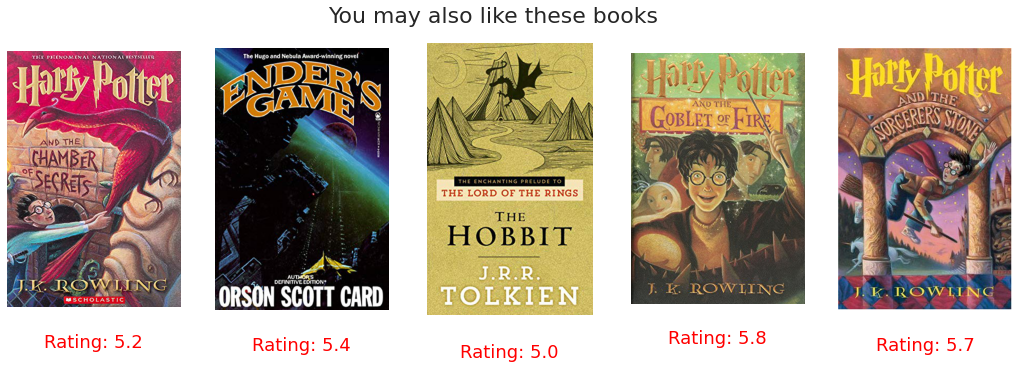

In [220]:
item_based_recommender('Wild Animus')

## **Memory-Based Collaborative Filtering**

In [221]:
# Split the all datasets to traing dataset and testing dataset 
train_data, test_data = train_test_split(explicit_book_rating, test_size=0.20)

In [223]:
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set lengths: 307080
Testing set lengths: 76771
Test set is 20% of the full dataset.


In [225]:
# Get the unique elements of user in training data and convert them to int index
user_unique_train = train_data.user_id.unique()  
train_data_user_to_index = {o:i for i, o in enumerate(user_unique_train)}

# Get the unique elements of item(isbn) in training data and convert them to int index
item_unique_train = train_data.isbn.unique()  
train_data_book_to_index = {o:i for i, o in enumerate(item_unique_train)}

# Get the unique elements of user in testing data and convert them to int index
user_unique_test = test_data.user_id.unique()  
test_data_user_to_index = {o:i for i, o in enumerate(user_unique_test)}

# Get the unique elements of item(isbn) in testing data and convert them to int index
item_unique_test = test_data.isbn.unique() 
test_data_book_to_index = {o:i for i, o in enumerate(item_unique_test)}

In [226]:
# convert values to index in training dataset
train_data['user_unique'] = train_data['user_id'].map(train_data_user_to_index)
train_data['item_unique'] = train_data['isbn'].map(train_data_book_to_index)

# convert values to index in testing dataset
test_data['user_unique'] = test_data['user_id'].map(test_data_user_to_index)
test_data['item_unique'] = test_data['isbn'].map(test_data_book_to_index)

# rechange features in traing and testing datasets
train_data = train_data[['user_unique', 'item_unique', 'book_rating']]
test_data = test_data[['user_unique', 'item_unique', 'book_rating']]

In [227]:
# Get the five random rows from training dataset
train_data.sample(5)

,user_unique,item_unique,book_rating
829776,14816,78239,9
118251,40261,7532,10
369678,3232,18428,8
742467,11068,34516,9
80151,5250,18411,10


In [228]:
# Show the number of unique values in training and testing datasets
num_users = train_data['user_unique'].nunique()
num_books = train_data['item_unique'].nunique()

In [229]:
# Create matrix from zero the dimension of this matrix is number of user and number of books
train_matrix = np.zeros((num_users, num_books))

for entry in train_data.itertuples():                  # entry[1] is the user-id, entry[2] is the book-isbn
    train_matrix[entry[1]-1, entry[2]-1] = entry[3]    # -1 is to counter 0-based indexing

In [230]:
# Show the dimension of train matrix 
train_matrix.shape

(59754, 128863)

In [231]:
# Create matrix from zero the dimension of this matrix is number of user and number of books
test_matrix = np.zeros((num_users, num_books))

for entry in test_data.itertuples():
    test_matrix[entry[1]-1, entry[2]-1] = entry[3] 

In [232]:
# Show the dimension of test matrix 
test_matrix.shape

(59754, 128863)

In [233]:
# Create 2 small dataframe from train and test matrix 
train_matrix_small = train_matrix[:8000, :8000]
test_matrix_small = test_matrix[:8000, :8000]

# Compute the distance matrix to user and item from train_matrix_small 
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine') 

In [234]:
# Show the data in train_matrix_small
train_matrix_small

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 6., 0., ..., 0., 0., 0.],
       [0., 0., 8., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [235]:
# Show the data in user_similarity
user_similarity

array([[0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 0.92938533,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.92938533, ..., 1.        , 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ]])

In [236]:
# Make the user define function to help us to predictation books
def predict_item_user_books(book_rating, similarity, type='user'): # default type is 'user'
    # When the type is user 
    if type == 'user':
        # get the mean value of column's name book_rating 
        mean_user_rating = book_rating.mean(axis=1)
        
        # Use np.newaxis so that mean_user_rating has the same format as ratings
        # newaxis it is the same transpose that is convert row to columns or convert column to rows
        ratings_diff = (book_rating - mean_user_rating[:, np.newaxis])
        # Make predict value by add mean rating with similarity multiply difference between rating and mean then divided absolute of similarity
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        # Make predict value by simikarity multiply rating then divided absolute of similarity
        pred = book_rating.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [244]:
# Predict the item and user values
item_predict = predict_item_user_books(train_matrix_small, item_similarity, type='item')
user_predict = predict_item_user_books(train_matrix_small, user_similarity, type='user')

In [245]:
# Show the item prediction
item_predict

array([[0.00510684, 0.01263213, 0.01224884, ..., 0.01228285, 0.01225684,
        0.01224826],
       [0.00075068, 0.        , 0.00067726, ..., 0.00075201, 0.00075042,
        0.00075019],
       [0.06405783, 0.0625112 , 0.05930319, ..., 0.06354171, 0.06388398,
        0.06401655],
       ...,
       [0.00225203, 0.00232019, 0.0022308 , ..., 0.00225603, 0.00225126,
        0.00225058],
       [0.00300271, 0.00285264, 0.00290196, ..., 0.00300805, 0.00300168,
        0.00300078],
       [0.00125113, 0.00127793, 0.00120638, ..., 0.00125335, 0.0012507 ,
        0.00125032]])

In [246]:
# Show the user prediction
user_predict

array([[ 6.89496409e-03,  1.00222155e-02,  5.44025522e-02, ...,
         1.05225758e-02,  7.39532432e-03,  7.64066261e-03],
       [-3.98184982e-03, -3.04143159e-03,  4.29828960e-02, ...,
        -9.81230415e-04, -4.10687563e-03, -3.85682402e-03],
       [ 5.93666212e-02,  6.17522948e-02,  1.02662203e-01, ...,
         6.22392704e-02,  5.92217746e-02,  5.94927772e-02],
       ...,
       [-2.47880660e-03,  2.26091353e-05,  4.44263061e-02, ...,
         5.22892282e-04, -2.60387739e-03, -2.35373581e-03],
       [-1.70954431e-03,  7.52396519e-04,  4.49298512e-02, ...,
         1.30016224e-03, -1.83494875e-03, -1.58413987e-03],
       [-3.46193112e-03, -9.58090821e-04,  4.31026524e-02, ...,
        -4.51910869e-04, -3.58734863e-03, -3.33651361e-03]])

In [249]:
# import mean_squared_error and sqrt
from sklearn.metrics import mean_squared_error
from math import sqrt

# Make the user define function to Root Mean Square Error by predict values and testing matrix
def rmse(predict, test_matrix):
    # Get the values that doesn't have zero
    predict = predict[test_matrix.nonzero()].flatten()
    test_matrix = test_matrix[test_matrix.nonzero()].flatten()
    # Get the Root Mean Square Error and return the result 
    return sqrt(mean_squared_error(predict, test_matrix))

# Print The Root Mean Square Error of Item data and user data using by item and user prediction and test matrix small
print(f'Item-based CF RMSE: {rmse(item_predict, test_matrix_small)}')
print(f'User-based CF RMSE: {rmse(user_predict, test_matrix_small)}')

Item-based CF RMSE: 7.938760842588952
User-based CF RMSE: 7.93846079741706


## **SVD Based recommendation System**

In [260]:
# Choose some of feature from explicit_book_rating dataset
ratings_explicit_sub_features = explicit_book_rating[['user_id', 'isbn', 'book_rating']]

In [269]:
from surprise import Reader, Dataset

# Creating a 'Reader' object to set the limit of the ratings 

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings_explicit_sub_features, reader)

In [270]:
from surprise import SVD, model_selection, accuracy

# Create object from SVD
model = SVD()

# Train on books dataset
%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=25, verbose=True)

Evaluating RMSE of algorithm SVD on 25 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Fold 11 Fold 12 Fold 13 Fold 14 Fold 15 Fold 16 Fold 17 Fold 18 Fold 19 Fold 20 Fold 21 Fold 22 Fold 23 Fold 24 Fold 25 Mean    Std     
RMSE (testset)    1.6201  1.6354  1.6210  1.6226  1.6220  1.6355  1.6312  1.6231  1.6254  1.6260  1.6533  1.6146  1.6438  1.6246  1.6429  1.6393  1.6311  1.6054  1.6309  1.6465  1.6453  1.6285  1.6408  1.6262  1.6320  1.6307  0.0108  
Fit time          26.35   24.60   25.09   24.61   25.70   24.68   25.19   25.01   25.27   25.17   25.26   24.91   25.04   25.02   25.42   25.17   25.39   25.41   25.68   25.16   25.87   25.04   25.19   25.19   25.32   25.23   0.38    
Test time         0.11    0.14    0.10    0.56    0.11    0.11    0.11    0.57    0.11    0.11    0.59    0.11    0.11    0.60    0.11    0.11    0.59    0.11    0.11    0.59    0.11    0.11    0.63    0.12    0.12    0.25    0.22    
CPU times:

{'test_rmse': array([1.62012854, 1.63541023, 1.6210019 , 1.62255041, 1.62202341,
        1.63552159, 1.63121583, 1.62306222, 1.62542756, 1.62601619,
        1.65332191, 1.61463637, 1.64380093, 1.62464852, 1.64289442,
        1.63934802, 1.63112527, 1.60540571, 1.63091078, 1.64646634,
        1.64534092, 1.62846794, 1.64077582, 1.62616823, 1.63196292]),
 'fit_time': (26.348062992095947,
  24.601412057876587,
  25.086389541625977,
  24.612040519714355,
  25.697404146194458,
  24.680830717086792,
  25.19487953186035,
  25.008692026138306,
  25.27391028404236,
  25.16677498817444,
  25.257529973983765,
  24.91494655609131,
  25.035785913467407,
  25.016077280044556,
  25.415813446044922,
  25.169867515563965,
  25.390565633773804,
  25.41010355949402,
  25.677447080612183,
  25.15954828262329,
  25.86631488800049,
  25.04007577896118,
  25.18858766555786,
  25.1905198097229,
  25.318437337875366),
 'test_time': (0.10909318923950195,
  0.13788414001464844,
  0.10400557518005371,
  0.5628132

In [271]:
trainset, testset = model_selection.train_test_split(data, test_size=0.2)
# Create Object from SVD
model = SVD()
# Training the model using by training dataset
model.fit(trainset)
# Testing the model using by testing dataset
predictions = model.test(testset)
# Call RMSE Function
accuracy.rmse(predictions)

RMSE: 1.6322


1.6321768340483738

In [273]:
# Select speific user and item
user_id = 44295  
item_id = '0425154092' 
# Prediction to specific user and item 
pred = model.predict(user_id, item_id, verbose=True)

user: 276744     item: 038550120X r_ui = None   est = 7.37   {'was_impossible': False}


In [286]:
# Show some of Result 
print(f'The estimated rating for the book with ISBN code {pred.iid} from user #{pred.uid} is {pred.est:.2f}.\n')
actual_rtg= ratings_explicit_sub_features[(ratings_explicit_sub_features.user_id==pred.uid) & 
                             (ratings_explicit_sub_features.isbn==pred.iid)].book_rating.values[0]
print(f'The real rating given for this was {actual_rtg:.2f}.')

The estimated rating for the book with ISBN code 038550120X from user #276744 is 7.37.

The real rating given for this was 7.00.


In [292]:
# The following function was adapted from the surprise docs
# and can be used to get the top book recommendations for each user.
from collections import defaultdict

def books_top_n(predictions, n=7):
#     '''Return the top recommendation for each user from a set of predictions.

#     Args:
#         predictions(list of Prediction objects): The list of predictions, as
#             returned by the test method of an algorithm.
#         n(int): The number of recommendation to output for each user. Default
#             is 7.

#     Returns:
#     A dict where keys are user (raw) ids and values are lists of tuples:
#         [(raw item id, rating estimation), ...] of size n.
#     '''

    # First map the predictions to each user.
    num_top = defaultdict(list)
    for user_id, item_id, true_r, est, _ in predictions:
        num_top[user_id].append((item_id, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in num_top.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        num_top[uid] = user_ratings[:n]
        
    return num_top

In [294]:
# Predictation the test dataset
pred = model.test(testset)
# Get the top of book to recommentation
num_top = books_top_n(pred)

In [302]:
def get_book_title_rating(userid):
    """
    Get the complete list of books from the full "books users ratings" dataframe.
    """
    book_title_rating = defaultdict(list)
    num_top = books_top_n(pred, n=7)
    print(num_top[userid])

    for n in num_top[userid]:
        book, rating = n
        title = explicit_book_rating.loc[explicit_book_rating.isbn==book].book_title.unique()[0]
        book_title_rating[title] = rating
    print(book_title_rating)
    return book_title_rating

In [303]:
# new_book_df= pd.merge(data, ratings_explicit, on='isbn')
# new_book_df.head()

In [310]:
# Get the Recommentation top title of books to specific user such as user is 225199
book_title_rating = get_book_title_rating(userid = 225199)
for book_title, rating in book_title_rating.items():
    print(f'{book_title}: {rating}')

[('0553283685', 8.949622268809247), ('0140441298', 8.867389857440891), ('0394726251', 8.856613986456166), ('0192833545', 8.781348247531598), ('0812502124', 8.494577805415265), ('0671774832', 8.4553737576441), ('0671883402', 8.379935672075922)]
defaultdict(<class 'list'>, {'Hyperion': 8.949622268809247, 'Medea and Other Plays (Penguin Classics)': 8.867389857440891, "The Discoverers: A History of Man's Search to Know His World and Himself": 8.856613986456166, "Wuthering Heights (Oxford World's Classics)": 8.781348247531598, 'Prentice Alvin (Tales of Alvin Maker, Book 3)': 8.494577805415265, 'Section 31: Abyss (Star Trek: Deep Space Nine)': 8.4553737576441, 'The Star Trek The Next Generation Companion (Star Trek: The Next Generation)': 8.379935672075922})
Hyperion: 8.949622268809247
Medea and Other Plays (Penguin Classics): 8.867389857440891
The Discoverers: A History of Man's Search to Know His World and Himself: 8.856613986456166
Wuthering Heights (Oxford World's Classics): 8.7813482475

In [312]:
# Show the result of book_title_rating
book_title_rating

defaultdict(list,
            {'Hyperion': 8.949622268809247,
             'Medea and Other Plays (Penguin Classics)': 8.867389857440891,
             "The Discoverers: A History of Man's Search to Know His World and Himself": 8.856613986456166,
             "Wuthering Heights (Oxford World's Classics)": 8.781348247531598,
             'Prentice Alvin (Tales of Alvin Maker, Book 3)': 8.494577805415265,
             'Section 31: Abyss (Star Trek: Deep Space Nine)': 8.4553737576441,
             'The Star Trek The Next Generation Companion (Star Trek: The Next Generation)': 8.379935672075922})

In [137]:
# !pip install surprise